In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!pip install folium
import folium

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


# Postal code

In [2]:
#create dataframe
data1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok')[0]
df=pd.DataFrame(data1)
headers = df.iloc[0]
df = pd.DataFrame(df.values[1:],columns=headers)
df.head()

,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude
0,Bang Bon,50,บางบอน,105161,4,NaN,NaN
1,Bang Kapi,06,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,40,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,05,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,31,บางคอแหลม,94956,3,13.693333,100.5025


In [3]:
#Retrieve only District and code 
df1 = df[['District(Khet)','Code']]
#Cheak NaN value
#df1[df1['District(Khet)'] == 'NaN'] 
#df1[df1['Code'] == 'NaN'] # There is no NaN value in code and district column
df1.head()

,District(Khet),Code
0,Bang Bon,50
1,Bang Kapi,06
2,Bang Khae,40
3,Bang Khen,05
4,Bang Kho Laem,31


# Finding coordinates

In [4]:
nom = Nominatim()

In [5]:
n = nom.geocode('50,Bang Bon,Bangkok')
n

Location(Le Bangkok, Rue des Martyrs de Vingré, Saint-Jacques - Chavanelle, Saint-Étienne, Loire, Auvergne-Rhône-Alpes, France métropolitaine, 42000, France, (45.4362176, 4.3899963, 0.0))

In [6]:
df1['Adress'] =  df1['Code']  + ',' + df1['District(Khet)'] + ',' + 'Bangkok'
df1.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,District(Khet),Code,Adress
0,Bang Bon,50,"50,Bang Bon,Bangkok"
1,Bang Kapi,06,"06,Bang Kapi,Bangkok"
2,Bang Khae,40,"40,Bang Khae,Bangkok"
3,Bang Khen,05,"05,Bang Khen,Bangkok"
4,Bang Kho Laem,31,"31,Bang Kho Laem,Bangkok"


In [7]:
df1['Coordinates'] = df1['Adress'].apply(nom.geocode)
df1.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,District(Khet),Code,Adress,Coordinates
0,Bang Bon,50,"50,Bang Bon,Bangkok","(Le Bangkok, Rue des Martyrs de Vingré, Saint-..."
1,Bang Kapi,06,"06,Bang Kapi,Bangkok","(creation church bangkok, รามคำแหง 35, กรุงเทพ..."
2,Bang Khae,40,"40,Bang Khae,Bangkok","(ทางพิเศษสายศรีรัช-วงแหวนรอบนอกกรุงเทพมหานคร, ..."
3,Bang Khen,05,"05,Bang Khen,Bangkok","(บางเขน, กรุงเทพมหานคร, เขตบางเขน, กรุงเทพมหาน..."
4,Bang Kho Laem,31,"31,Bang Kho Laem,Bangkok","(The Bangkok, กรุงเทพมหานคร, เขตสาทร, กรุงเทพม..."


In [8]:
df1['Latitude'] = df1['Coordinates'].apply(lambda x: x.latitude if x != None else None)
df1['Longitude'] = df1['Coordinates'].apply(lambda x: x.longitude if x != None else None)
df1.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,District(Khet),Code,Adress,Coordinates,Latitude,Longitude
0,Bang Bon,50,"50,Bang Bon,Bangkok","(Le Bangkok, Rue des Martyrs de Vingré, Saint-...",45.436218,4.389996
1,Bang Kapi,06,"06,Bang Kapi,Bangkok","(creation church bangkok, รามคำแหง 35, กรุงเทพ...",13.758018,100.612830
2,Bang Khae,40,"40,Bang Khae,Bangkok","(ทางพิเศษสายศรีรัช-วงแหวนรอบนอกกรุงเทพมหานคร, ...",13.786958,100.458662
3,Bang Khen,05,"05,Bang Khen,Bangkok","(บางเขน, กรุงเทพมหานคร, เขตบางเขน, กรุงเทพมหาน...",13.875382,100.596745
4,Bang Kho Laem,31,"31,Bang Kho Laem,Bangkok","(The Bangkok, กรุงเทพมหานคร, เขตสาทร, กรุงเทพม...",13.708728,100.533450


In [9]:
#Get only District, Code , Latitude , Longitude
df_Bangkok = df[['District(Khet)','Code','Latitude','Longitude']]
df_Bangkok.rename(columns = {'District(Khet)' : 'District'} , inplace = True)
df_Bangkok # There is NaN in some rows

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,District,Code,Latitude,Longitude
0,Bang Bon,50,NaN,NaN
1,Bang Kapi,06,13.765833,100.647778
2,Bang Khae,40,13.696111,100.409444
3,Bang Khen,05,13.873889,100.596389
4,Bang Kho Laem,31,13.693333,100.5025
5,Bang Khun Thian,21,13.660833,100.435833
6,Bang Na,47,13.680081,100.5918
7,Bang Phlat,25,13.793889,100.505
8,Bang Rak,04,13.730833,100.524167
9,Bang Sue,29,13.809722,100.537222


In [10]:
# Fill missing Latitude and Longitude with value from wikipedia
df_Bangkok.Latitude[df_Bangkok['Latitude'].isna()] = df1.Latitude[df_Bangkok['Latitude'].isna()]
df_Bangkok.Latitude[df_Bangkok['Latitude'].isna()]

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


19    NaN
Name: Latitude, dtype: object

In [11]:
df_Bangkok.Longitude[df_Bangkok['Longitude'].isna()] = df1.Longitude[df_Bangkok['Longitude'].isna()]
df_Bangkok.Longitude[df_Bangkok['Longitude'].isna()]

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


19    NaN
Name: Longitude, dtype: object

In [12]:
# Drop row which has no Latitude and Longitude
df_Bangkok = df_Bangkok[df_Bangkok['Latitude'].notnull()]
df_Bangkok.sort_values(by = ['Code'], inplace = True)
df_Bangkok.reset_index(drop=True, inplace = True)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [13]:
#Bang bon corordinates is wrong when check with the real map. So ,it will be dropped
df_Bangkok = df_Bangkok[df_Bangkok['District'] != 'Bang Bon']
df_Bangkok

,District,Code,Latitude,Longitude
0,Phra Nakhon,01,13.764444,100.499167
1,Dusit,02,13.776944,100.520556
2,Nong Chok,03,13.855556,100.8625
3,Bang Rak,04,13.730833,100.524167
4,Bang Khen,05,13.873889,100.596389
5,Bang Kapi,06,13.765833,100.647778
6,Pathum Wan,07,13.744942,100.5222
7,Pom Prap Sattru Phai,08,13.758056,100.513056
8,Phra Khanong,09,13.702222,100.601667
9,Min Buri,10,13.813889,100.748056


In [14]:
address = 'Bangkok'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 13.7538929, 100.8160803.


In [15]:
#Create Bangkok map
map_Bangkok = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, borough, neighborhood in zip(df_Bangkok['Latitude'], df_Bangkok['Longitude'], df_Bangkok['District'], df_Bangkok['Code']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Bangkok)  
    
map_Bangkok

In [16]:
CLIENT_ID = 'PGZ15WX55SAQEGI2RZYR2MHDNH3VAK2ZJWUHVBAX154EG3KU' 
CLIENT_SECRET =  'ZNA30WO3BE4ZXSIAFDGC2ZRLZDCTRICDSL15XVIZE4C3HU1A'
VERSION = '20180605'

In [17]:
df_Bangkok.loc[0, 'District']

'Phra Nakhon'

In [18]:
neighborhood_latitude = df_Bangkok.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_Bangkok.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_Bangkok.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Phra Nakhon are 13.764444, 100.499167.


Get Top 100 vanues with in 500 radius

In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=PGZ15WX55SAQEGI2RZYR2MHDNH3VAK2ZJWUHVBAX154EG3KU&client_secret=ZNA30WO3BE4ZXSIAFDGC2ZRLZDCTRICDSL15XVIZE4C3HU1A&v=20180605&ll=13.764444,100.499167&radius=500&limit=100'

Send the GET request

In [20]:
results = requests.get(url).json()

Define function that extracts the category of the venue for all the District in Bangkok

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
Bangkok_venues = getNearbyVenues(names= df_Bangkok['District'],
                                   latitudes= df_Bangkok['Latitude'],
                                   longitudes= df_Bangkok['Longitude']
                                  )

Phra Nakhon
Dusit
Nong Chok
Bang Rak
Bang Khen
Bang Kapi
Pathum Wan
Pom Prap Sattru Phai
Phra Khanong
Min Buri
Lat Krabang
Yan Nawa
Samphanthawong
Phaya Thai
Thon Buri
Bangkok Yai
Huai Khwang
Khlong San
Taling Chan
Bangkok Noi
Bang Khun Thian
Phasi Charoen
Nong Khaem
Rat Burana
Bang Phlat
Din Daeng
Bueng Kum
Sathon
Bang Sue
Chatuchak
Bang Kho Laem
Prawet
Khlong Toei
Suan Luang
Chom Thong
Don Mueang
Ratchathewi
Lat Phrao
Watthana
Bang Khae
Lak Si
Sai Mai
Saphan Sung
Wang Thonglang
Khlong Sam Wa
Bang Na
Thawi Watthana
Thung Khru


In [23]:
print(Bangkok_venues.shape)
Bangkok_venues.head()

(1059, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Phra Nakhon,13.764444,100.499167,Adhere the 13th Blues Bar,13.763043,100.498839,Jazz Club
1,Phra Nakhon,13.764444,100.499167,Casa Nithra Hotel,13.765834,100.500721,Hotel
2,Phra Nakhon,13.764444,100.499167,Baan Sabai Thai Massage (บ้านสบายนวดแผนไทย),13.764173,100.500029,Massage Studio
3,Phra Nakhon,13.764444,100.499167,Teddy The Bake,13.766085,100.499858,Café
4,Phra Nakhon,13.764444,100.499167,Thamna Hometaurant (ทำนา),13.765223,100.500124,Vegetarian / Vegan Restaurant


Analyze the data

In [24]:
# one hot encoding
Bangkok_onehot = pd.get_dummies(Bangkok_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bangkok_onehot['Neighborhood'] = Bangkok_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Bangkok_onehot.columns[-1]] + list(Bangkok_onehot.columns[:-1])
Bangkok_onehot = Bangkok_onehot[fixed_columns]

Bangkok_onehot.head()

,Vietnamese Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Garage,BBQ Joint,...,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Tour Provider,Train Station,Vegetarian / Vegan Restaurant,Veterinarian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
Bangkok_onehot.shape

(1059, 164)

In [26]:
Bangkok_grouped = Bangkok_onehot.groupby('Neighborhood').mean().reset_index()
Bangkok_grouped

,Neighborhood,Vietnamese Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Garage,...,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Tour Provider,Train Station,Vegetarian / Vegan Restaurant,Veterinarian
0,Bang Kapi,0.000000,0.000000,0.000000,0.050000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1,Bang Khae,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,Bang Khen,0.153846,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.153846,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,Bang Kho Laem,0.062500,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.125000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
4,Bang Khun Thian,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
5,Bang Na,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
6,Bang Phlat,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.153846,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
7,Bang Rak,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.085714,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
8,Bang Sue,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.181818,0.000000,0.000,0.000000,0.090909,0.000000,0.000000
9,Bangkok Noi,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.050000,0.050000,...,0.000000,0.000000,0.000000,0.150000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [27]:
Bangkok_grouped.shape

(48, 164)

Print each neighborhood along with the top 5 most common venues

In [28]:
num_top_venues = 5

for hood in Bangkok_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Bangkok_grouped[Bangkok_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bang Kapi----
               venue  freq
0    Thai Restaurant  0.10
1  Convenience Store  0.10
2   Ramen Restaurant  0.05
3         Steakhouse  0.05
4             Market  0.05


----Bang Khae----
                  venue  freq
0           Coffee Shop   0.2
1                  Café   0.2
2  Fast Food Restaurant   0.1
3         Shopping Mall   0.1
4          Noodle House   0.1


----Bang Khen----
                   venue  freq
0  Vietnamese Restaurant  0.15
1       Asian Restaurant  0.15
2           Noodle House  0.15
3      Convenience Store  0.08
4            Coffee Shop  0.08


----Bang Kho Laem----
                     venue  freq
0             Noodle House  0.19
1       Chinese Restaurant  0.12
2          Thai Restaurant  0.12
3    Vietnamese Restaurant  0.06
4  Comfort Food Restaurant  0.06


----Bang Khun Thian----
                 venue  freq
0      Thai Restaurant  0.10
1  Japanese Restaurant  0.08
2         Noodle House  0.05
3            BBQ Joint  0.05
4          Coffee Sho

                venue  freq
0                Café  0.13
1         Coffee Shop  0.09
2     Thai Restaurant  0.08
3           Nightclub  0.06
4  Chinese Restaurant  0.06


----Yan Nawa----
                  venue  freq
0  Fast Food Restaurant  0.11
1                  Café  0.07
2       Thai Restaurant  0.07
3           Coffee Shop  0.07
4    Chinese Restaurant  0.07




Define a function to sort the venues in descending order

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Bangkok_grouped['Neighborhood']

for ind in np.arange(Bangkok_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bangkok_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bang Kapi,Convenience Store,Thai Restaurant,Coffee Shop,Soccer Field,Park,Noodle House,Ramen Restaurant,Museum,Multiplex,Massage Studio
1,Bang Khae,Coffee Shop,Café,BBQ Joint,Thai Restaurant,Fast Food Restaurant,Noodle House,Shopping Mall,Convenience Store,Dim Sum Restaurant,Diner
2,Bang Khen,Vietnamese Restaurant,Noodle House,Asian Restaurant,Coffee Shop,Som Tum Restaurant,Intersection,Garden Center,Convenience Store,Hotel,Park
3,Bang Kho Laem,Noodle House,Thai Restaurant,Chinese Restaurant,Vietnamese Restaurant,Supermarket,Hotpot Restaurant,Fast Food Restaurant,Convenience Store,Comfort Food Restaurant,Seafood Restaurant
4,Bang Khun Thian,Thai Restaurant,Japanese Restaurant,Restaurant,Bakery,Pizza Place,BBQ Joint,Noodle House,Coffee Shop,Shopping Mall,Food Court


# Elbow analysis

In [31]:
Bangkok_grouped_clustering = Bangkok_grouped.drop('Neighborhood', 1)

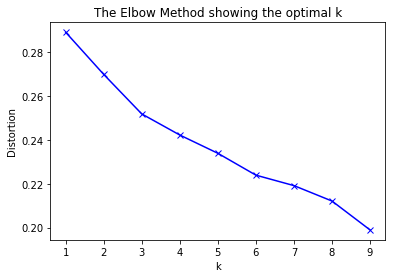

In [34]:
# k means determine k
data=Bangkok_grouped_clustering

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



k = 6 is an optimal number

In [35]:
kclusters = 6

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bangkok_grouped_clustering)

kmeans.labels_[0:10] 

array([3, 3, 1, 1, 3, 2, 3, 1, 2, 1], dtype=int32)

In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Bangkok_merged = df_Bangkok

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Bangkok_merged = Bangkok_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='District')

Bangkok_merged.head() 

,District,Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Phra Nakhon,01,13.764444,100.499167,3,Hostel,Noodle House,Thai Restaurant,Café,Hotel,Halal Restaurant,Massage Studio,Asian Restaurant,Jazz Club,Beer Bar
1,Dusit,02,13.776944,100.520556,1,Noodle House,Asian Restaurant,Convenience Store,Som Tum Restaurant,Coffee Shop,Dessert Shop,Market,Diner,Electronics Store,Floating Market
2,Nong Chok,03,13.855556,100.8625,3,Convenience Store,Dessert Shop,Shopping Mall,Jewelry Store,Other Repair Shop,Flea Market,Park,Department Store,Dim Sum Restaurant,Diner
3,Bang Rak,04,13.730833,100.524167,1,Noodle House,Hotel,Thai Restaurant,Chinese Restaurant,Hostel,Bar,Hotel Bar,Massage Studio,Clothing Store,Café
4,Bang Khen,05,13.873889,100.596389,1,Vietnamese Restaurant,Noodle House,Asian Restaurant,Coffee Shop,Som Tum Restaurant,Intersection,Garden Center,Convenience Store,Hotel,Park


In [37]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Bangkok_merged['Latitude'], Bangkok_merged['Longitude'], Bangkok_merged['District'], Bangkok_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine each clusters

# Cluster 0

In [38]:
Bangkok_merged.loc[Bangkok_merged['Cluster Labels'] == 0, Bangkok_merged.columns[[1] + list(range(5, Bangkok_merged.shape[1]))]]

,Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,19,River,Convenience Store,Floating Market,Soccer Field,Dance Studio,Duty-free Shop,Coworking Space,Flea Market,Fast Food Restaurant,Farmers Market
25,26,Convenience Store,Gym,Hotel,Park,Recreation Center,Stadium,Sports Club,Discount Store,Fast Food Restaurant,Farmers Market
26,27,Convenience Store,Food Truck,Gourmet Shop,Park,Thai Restaurant,Steakhouse,Pharmacy,Gym / Fitness Center,Coworking Space,Farmers Market
35,36,Convenience Store,Thai Restaurant,Spa,Buffet,Food Truck,Restaurant,Flea Market,Hotel,Department Store,Creperie
42,44,Convenience Store,Thai Restaurant,Stadium,Japanese Restaurant,Dance Studio,Dumpling Restaurant,Floating Market,Flea Market,Fast Food Restaurant,Farmers Market
44,46,Convenience Store,Coffee Shop,Soup Place,Grocery Store,Thai Restaurant,Pub,Donburi Restaurant,Fast Food Restaurant,Farmers Market,Farm


Count cluster 0 

In [39]:
Bangkok_merged.loc[Bangkok_merged['Cluster Labels'] == 0, Bangkok_merged.columns[[1] + list(range(5, Bangkok_merged.shape[1]))]].shape[0]

6

# Cluster 1

In [40]:
Bangkok_merged.loc[Bangkok_merged['Cluster Labels'] == 1, Bangkok_merged.columns[[1] + list(range(5, Bangkok_merged.shape[1]))]]

,Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,02,Noodle House,Asian Restaurant,Convenience Store,Som Tum Restaurant,Coffee Shop,Dessert Shop,Market,Diner,Electronics Store,Floating Market
3,04,Noodle House,Hotel,Thai Restaurant,Chinese Restaurant,Hostel,Bar,Hotel Bar,Massage Studio,Clothing Store,Café
4,05,Vietnamese Restaurant,Noodle House,Asian Restaurant,Coffee Shop,Som Tum Restaurant,Intersection,Garden Center,Convenience Store,Hotel,Park
7,08,Noodle House,Café,Chinese Restaurant,Dim Sum Restaurant,Convenience Store,Asian Restaurant,Other Nightlife,Breakfast Spot,Mediterranean Restaurant,Shopping Mall
14,15,Noodle House,Market,Intersection,Seafood Restaurant,Spa,Bakery,Bus Stop,Dessert Shop,Train Station,Diner
15,16,Noodle House,Coffee Shop,Asian Restaurant,Dessert Shop,Chinese Restaurant,Farmers Market,Photography Studio,Seafood Restaurant,Soup Place,BBQ Joint
16,17,Noodle House,Chinese Restaurant,Hotel,Asian Restaurant,Convenience Store,Grocery Store,Thai Restaurant,Comfort Food Restaurant,Hotpot Restaurant,Som Tum Restaurant
19,20,Noodle House,Thai Restaurant,Food Truck,Café,Park,Dessert Shop,Coffee Shop,Asian Restaurant,Auto Garage,Chinese Restaurant
22,23,Antique Shop,Playground,Coffee Shop,Market,Dessert Shop,Steakhouse,Noodle House,Veterinarian,Duty-free Shop,Flea Market
27,28,Noodle House,Asian Restaurant,Chinese Restaurant,Thai Restaurant,Dessert Shop,Seafood Restaurant,Coffee Shop,Bakery,Convenience Store,Supermarket


Count cluster 1

In [41]:
Bangkok_merged.loc[Bangkok_merged['Cluster Labels'] == 1, Bangkok_merged.columns[[1] + list(range(5, Bangkok_merged.shape[1]))]].shape[0]

12

# Cluster 2

In [42]:
Bangkok_merged.loc[Bangkok_merged['Cluster Labels'] == 2, Bangkok_merged.columns[[1] + list(range(5, Bangkok_merged.shape[1]))]]

,Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,11,Thai Restaurant,Flea Market,Restaurant,Asian Restaurant,Café,Steakhouse,Noodle House,Fast Food Restaurant,Farmers Market,Farm
23,24,Thai Restaurant,Paper / Office Supplies Store,Bistro,Coffee Shop,Hotpot Restaurant,Intersection,Chinese Restaurant,Food Truck,Noodle House,Veterinarian
28,29,Noodle House,Coffee Shop,Thai Restaurant,Bar,Train Station,Seafood Restaurant,Hotpot Restaurant,Badminton Court,Flea Market,Fast Food Restaurant
45,47,Thai Restaurant,Noodle House,Asian Restaurant,Seafood Restaurant,Satay Restaurant,Restaurant,Café,Coffee Shop,Diner,Dim Sum Restaurant


Count cluster 2

In [43]:
Bangkok_merged.loc[Bangkok_merged['Cluster Labels'] == 2, Bangkok_merged.columns[[1] + list(range(5, Bangkok_merged.shape[1]))]].shape[0]

4

# Cluster 3

In [44]:
Bangkok_merged.loc[Bangkok_merged['Cluster Labels'] == 3, Bangkok_merged.columns[[1] + list(range(5, Bangkok_merged.shape[1]))]]

,Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,01,Hostel,Noodle House,Thai Restaurant,Café,Hotel,Halal Restaurant,Massage Studio,Asian Restaurant,Jazz Club,Beer Bar
2,03,Convenience Store,Dessert Shop,Shopping Mall,Jewelry Store,Other Repair Shop,Flea Market,Park,Department Store,Dim Sum Restaurant,Diner
5,06,Convenience Store,Thai Restaurant,Coffee Shop,Soccer Field,Park,Noodle House,Ramen Restaurant,Museum,Multiplex,Massage Studio
6,07,Noodle House,Convenience Store,Thai Restaurant,Asian Restaurant,Chinese Restaurant,Japanese Restaurant,Dessert Shop,Hotpot Restaurant,Som Tum Restaurant,Sporting Goods Shop
8,09,Convenience Store,Fast Food Restaurant,Shopping Mall,Italian Restaurant,Café,Hotel,Coffee Shop,Pharmacy,Pizza Place,Residential Building (Apartment / Condo)
9,10,Department Store,Thai Restaurant,Beach,Farm,Veterinarian,Duty-free Shop,Fondue Restaurant,Floating Market,Flea Market,Fast Food Restaurant
11,12,Fast Food Restaurant,Coffee Shop,Brewery,Café,Thai Restaurant,Hotpot Restaurant,Chinese Restaurant,Japanese Restaurant,Electronics Store,Bike Rental / Bike Share
12,13,Art Gallery,Hotel Bar,Hostel,Hotel,Restaurant,Chinese Restaurant,Coffee Shop,Creperie,Sake Bar,Pool
13,14,Café,Coffee Shop,Thai Restaurant,Japanese Restaurant,Sushi Restaurant,Bar,Dessert Shop,Som Tum Restaurant,Burger Joint,Bakery
17,18,Hotel Bar,Noodle House,Department Store,Clothing Store,Hotel,Chinese Restaurant,Coffee Shop,Dessert Shop,Diner,Italian Restaurant


Count cluster 3

In [45]:
Bangkok_merged.loc[Bangkok_merged['Cluster Labels'] == 3, Bangkok_merged.columns[[1] + list(range(5, Bangkok_merged.shape[1]))]].shape[0]

23

# Cluster 4

In [47]:
Bangkok_merged.loc[Bangkok_merged['Cluster Labels'] == 4, Bangkok_merged.columns[[1] + list(range(5, Bangkok_merged.shape[1]))]]

,Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,48,Seafood Restaurant,Harbor / Marina,Fast Food Restaurant,Grocery Store,Beer Garden,Italian Restaurant,Dumpling Restaurant,Flea Market,Farmers Market,Farm


Count cluster 4

In [46]:
Bangkok_merged.loc[Bangkok_merged['Cluster Labels'] == 4, Bangkok_merged.columns[[1] + list(range(5, Bangkok_merged.shape[1]))]].shape[0]

1

# Cluster 5

In [48]:
Bangkok_merged.loc[Bangkok_merged['Cluster Labels'] == 5, Bangkok_merged.columns[[1] + list(range(5, Bangkok_merged.shape[1]))]]

,Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,32,Convenience Store,Comfort Food Restaurant,Halal Restaurant,Food Stand,Dumpling Restaurant,Flea Market,Fast Food Restaurant,Farmers Market,Farm,Electronics Store
34,35,Convenience Store,Coffee Shop,Diner,Dumpling Restaurant,Floating Market,Flea Market,Fast Food Restaurant,Farmers Market,Farm,Electronics Store


Count cluster 5

In [49]:
Bangkok_merged.loc[Bangkok_merged['Cluster Labels'] == 5, Bangkok_merged.columns[[1] + list(range(5, Bangkok_merged.shape[1]))]].shape[0]

2

# Plot the number of each cluster

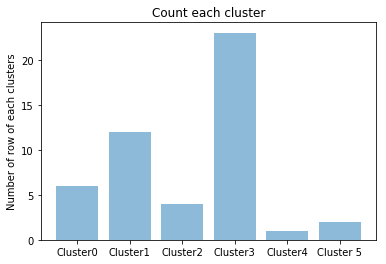

In [51]:
objects = ('Cluster0', 'Cluster1', 'Cluster2', 'Cluster3','Cluster4','Cluster 5')
y_pos = np.arange(len(objects))
performance = [6,12,4,23,1,2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of row of each clusters')
plt.title('Count each cluster')

plt.show()